# Import All Manditory Python Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Explore using pandas

In [3]:
data=pd.read_csv('health_insurance_cost_missing_data.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
age         19 non-null int64
sex         19 non-null object
bmi         18 non-null float64
children    19 non-null int64
smoker      19 non-null object
region      18 non-null object
charges     19 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.2+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,19.000000,18.000000,19.000000,19.000000
mean,36.000000,30.518333,0.631579,11169.001194
std,14.843629,5.891149,1.011628,10961.698148
min,18.000000,22.705000,0.000000,1725.552300
25%,24.000000,25.935000,0.000000,3238.971200
50%,32.000000,29.355000,0.000000,7281.505600
75%,49.000000,33.687500,1.000000,13987.820900
max,62.000000,42.130000,3.000000,39611.757700


In [9]:
data.isna().sum()

age         0
sex         0
bmi         1
children    0
smoker      0
region      1
charges     0
dtype: int64

In [26]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [27]:
data1=data.fillna(method='pad')

In [28]:
data1.isna().sum()

age         0
sex         0
bmi         1
children    0
smoker      0
region      1
charges     0
dtype: int64

In [29]:
data1=data.fillna(method='bfill')

In [30]:
data1.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
data1.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,33.77,0,yes,southeast,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [32]:
data1=data1.drop('sex',axis=1)
data1.head(1)

,age,bmi,children,smoker,region,charges
0,19,33.77,0,yes,southeast,16884.924


In [33]:
data1=data1.drop('smoker',axis=1)
data1.head(1)

,age,bmi,children,region,charges
0,19,33.77,0,southeast,16884.924


In [34]:
data1=data1.drop('region',axis=1)
data1.head(1)

,age,bmi,children,charges
0,19,33.77,0,16884.924


In [35]:
data1.head()

,age,bmi,children,charges
0,19,33.770,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [36]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,19.0,36.000000,14.843629,18.0000,24.0000,32.0000,49.0000,62.0000
bmi,19.0,30.689474,5.773564,22.7050,26.0300,29.8300,33.7700,42.1300
children,19.0,0.631579,1.011628,0.0000,0.0000,0.0000,1.0000,3.0000
charges,19.0,11169.001194,10961.698148,1725.5523,3238.9712,7281.5056,13987.8209,39611.7577


(19-36) / 14.84

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
data2=sc.fit_transform(data1)

# Model-1 

In [41]:
data1.head()

,age,bmi,children,charges
0,19,33.770,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [42]:
x=data1.iloc[:,0:3]
x.head(2)

,age,bmi,children
0,19,33.77,0
1,18,33.77,1


In [44]:
y=data1.iloc[:,-1:]
y.head(2)

,charges
0,16884.9240
1,1725.5523


# Split the records/ data fro training & testing of ratio 75:25

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [48]:
data1.shape

(19, 4)

# Train the Regression Model by calling linear regression algorthm from the sklearn

In [53]:
from sklearn.linear_model import LinearRegression
mul_reg=LinearRegression()

In [54]:
mul_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Train

In [55]:
mul_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test the model

In [56]:
ypred=mul_reg.predict(x_test)
ypred

array([[22424.38585167],
       [ 7537.60333234],
       [-3378.7802843 ],
       [-1634.74692234]])

In [57]:
data1.head(2)

,age,bmi,children,charges
0,19,33.77,0,16884.9240
1,18,33.77,1,1725.5523


# How do you forcast by this trained model

In [58]:
unseen_pred= mul_reg.predict(np.array([[19,33,0]]))
print('The insurance charges for this person is...',unseen_pred)

The insurance charges for this person is... [[-1134.3446793]]


# Evaluation

In [59]:
from sklearn.metrics import r2_score,mean_squared_error
print('The R-square...',r2_score(y_test,ypred))
print('RMSE value is..',np.sqrt(mean_squared_error(y_test,ypred)))

The R-square... -2.1527759284388677
RMSE value is.. 23700.594531309987


In [60]:
data1.corr()

,age,bmi,children,charges
age,1.000000,0.122708,-0.103592,0.407481
bmi,0.122708,1.000000,-0.036180,0.196555
children,-0.103592,-0.036180,1.000000,-0.317735
charges,0.407481,0.196555,-0.317735,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000296F8DF7C48>,
      dtype=object)

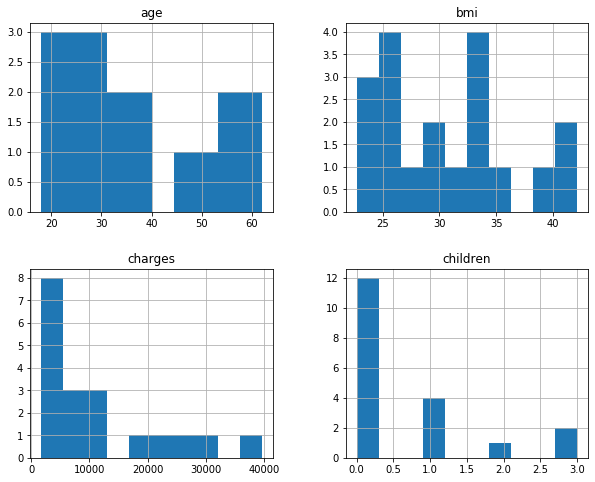

In [62]:
data1.hist(figsize=(10,8))

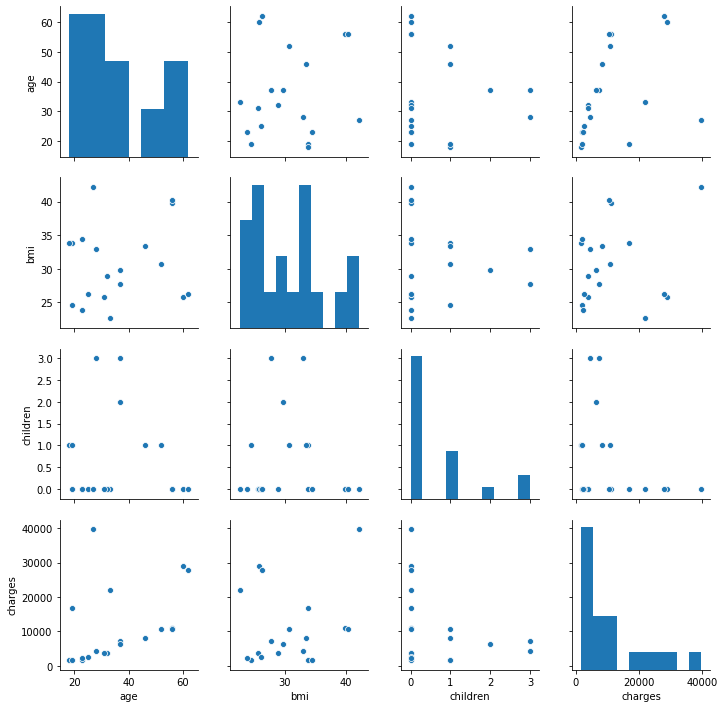

In [63]:
sns.pairplot(data1)

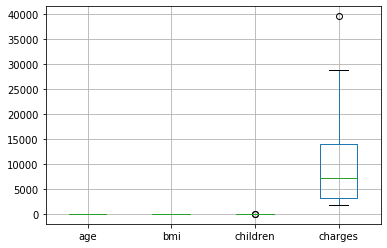

In [64]:
data1.boxplot()

In [66]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [67]:
data1.head(1)

,age,bmi,children,charges
0,19,33.77,0,16884.924


In [69]:
data2=data.fillna(method='bfill')
data2.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,33.77,0,yes,southeast,16884.924


In [78]:
data3=pd.read_csv('health_insurance_cost.csv')
data3.shape

(1338, 7)

In [79]:
data3.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
ec=LabelEncoder()

In [82]:
ec.fit_transform(data3['smoker'])

array([1, 0, 0, ..., 0, 0, 1])

In [84]:
data['smoker']=pd.Categorical(data['smoker'])

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
age         19 non-null int64
sex         19 non-null object
bmi         18 non-null float64
children    19 non-null int64
smoker      19 non-null category
region      18 non-null object
charges     19 non-null float64
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [87]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,NaN,0,yes,NaN,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
